In [ ]:
!pip install flair==0.9

In [ ]:
# convert tabs to white spaces
with open('ner_data/dev.txt') as f:
    lines = [line.rstrip() for line in f]
    
new_lines = []
for line in lines:
    new_line = line.replace('\t',' ')
    new_lines.append(new_line)

with open('ner_data/dev2.txt', 'w') as f:
    for line in new_lines:
        f.write(f"{line}\n")

In [ ]:
# removing the new line characters
with open('ner_data/dev2.txt') as f:
    lines = [line.rstrip() for line in f]
    
new_lines = []
for line in lines:
    parts = line.split(' ')
    if len(parts) > 1 and parts[0] == '':
        continue
    new_lines.append(line)

with open('ner_data/dev3.txt', 'w') as f:
    for line in new_lines:
        f.write(f"{line}\n")

In [1]:
from flair.datasets import ColumnCorpus
from flair.embeddings import WordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

In [4]:
data_folder = "data"
columns = {0: 'text', 1: 'ner'}

In [3]:
embeddings = WordEmbeddings('glove')

In [5]:
corpus = ColumnCorpus(data_folder, columns,
                              train_file='JUDGEMENT_BIO.txt',)

2022-12-13 14:18:41,962 Reading data from data
2022-12-13 14:18:41,966 Train: data/JUDGEMENT_BIO.txt
2022-12-13 14:18:41,972 Dev: None
2022-12-13 14:18:41,974 Test: None


In [6]:
 tag_dictionary = corpus.make_tag_dictionary('ner')

In [ ]:
# visualize the data
import operator

label_dict = {}
with open('ner_data/dev.txt') as f:
    lines = [line.rstrip() for line in f]
    
for line in lines:
    parts = line.split(' ')
    if len(parts) > 1 and parts[1].startswith('B'):
        label_parts = parts[1].split('-')
        if label_parts[1] not in label_dict:
            label_dict[label_parts[1]] = 0
        label_dict[label_parts[1]] += 1
        
print(label_dict)

# sorted_label_dict = {k: v for k, v in sorted(label_dict.items(), key=lambda item: item[1])}
sorted_label_dict = dict(sorted(label_dict.items(), key=operator.itemgetter(1),reverse=True))
        
import matplotlib.pyplot as plt
plt.bar(range(len(sorted_label_dict)), list(sorted_label_dict.values()), align='center')
plt.xticks(range(len(sorted_label_dict)), list(sorted_label_dict.keys()), rotation = 45)
plt.show()

In [7]:
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        use_crf=True)

In [8]:
trainer = ModelTrainer(tagger, corpus)

In [9]:
trainer.train('flair-model',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=15)

2022-12-13 14:19:09,006 ----------------------------------------------------------------------------------------------------
2022-12-13 14:19:09,008 Model: "SequenceTagger(
  (embeddings): WordEmbeddings('glove')
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=29, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-12-13 14:19:09,011 ----------------------------------------------------------------------------------------------------
2022-12-13 14:19:09,013 Corpus: "Corpus: 7642 train + 849 dev + 944 test sentences"
2022-12-13 14:19:09,014 ----------------------------------------------------------------------------------------------------
2022-12-13 14:19:09,015 Parameters:
2022-12-13 14:19:09,017  - learning_rate: "0.1"
2022-12-13 14:19:09,018  - mini_bat

2022-12-13 14:35:51,746 epoch 5 - iter 92/239 - loss 0.17505638 - samples/sec: 31.38 - lr: 0.100000
2022-12-13 14:36:17,233 epoch 5 - iter 115/239 - loss 0.17501465 - samples/sec: 28.89 - lr: 0.100000
2022-12-13 14:36:39,104 epoch 5 - iter 138/239 - loss 0.17525485 - samples/sec: 33.67 - lr: 0.100000
2022-12-13 14:37:01,790 epoch 5 - iter 161/239 - loss 0.17369043 - samples/sec: 32.46 - lr: 0.100000
2022-12-13 14:37:22,054 epoch 5 - iter 184/239 - loss 0.17101394 - samples/sec: 36.33 - lr: 0.100000
2022-12-13 14:37:41,986 epoch 5 - iter 207/239 - loss 0.16971850 - samples/sec: 36.94 - lr: 0.100000
2022-12-13 14:38:03,595 epoch 5 - iter 230/239 - loss 0.16833488 - samples/sec: 34.07 - lr: 0.100000
2022-12-13 14:38:11,268 ----------------------------------------------------------------------------------------------------
2022-12-13 14:38:11,269 EPOCH 5 done: loss 0.1672 - lr 0.1000000
2022-12-13 14:38:18,436 DEV : loss 0.12075505405664444 - f1-score (micro avg)  0.5897
2022-12-13 14:38:1

2022-12-13 14:56:10,096 ----------------------------------------------------------------------------------------------------
2022-12-13 14:56:10,097 EPOCH 10 done: loss 0.1234 - lr 0.1000000
2022-12-13 14:56:14,835 DEV : loss 0.08497387915849686 - f1-score (micro avg)  0.6998
2022-12-13 14:56:14,902 BAD EPOCHS (no improvement): 0
2022-12-13 14:56:14,904 saving best model
2022-12-13 14:56:19,785 ----------------------------------------------------------------------------------------------------
2022-12-13 14:56:38,465 epoch 11 - iter 23/239 - loss 0.12373274 - samples/sec: 39.43 - lr: 0.100000
2022-12-13 14:56:57,471 epoch 11 - iter 46/239 - loss 0.11919933 - samples/sec: 38.74 - lr: 0.100000
2022-12-13 14:57:16,997 epoch 11 - iter 69/239 - loss 0.11925947 - samples/sec: 37.71 - lr: 0.100000
2022-12-13 14:57:36,680 epoch 11 - iter 92/239 - loss 0.11815369 - samples/sec: 37.40 - lr: 0.100000
2022-12-13 14:57:55,408 epoch 11 - iter 115/239 - loss 0.11801137 - samples/sec: 39.31 - lr: 0.10

2022-12-13 15:15:24,544 ----------------------------------------------------------------------------------------------------


{'test_score': 0.7131077622974127,
 'dev_score_history': [0.21753097751262046,
  0.38676644348168565,
  0.509594882729211,
  0.5627615062761506,
  0.5897097625329815,
  0.6466265865063461,
  0.658397586322494,
  0.6615589606928713,
  0.6764322916666665,
  0.6998075689544581,
  0.7156139788393715,
  0.699934768427919,
  0.7102622207834252,
  0.7209227811598847,
  0.7262924199175388],
 'train_loss_history': [0.597567004246329,
  0.2963807341180455,
  0.22182238104178237,
  0.1861380507979234,
  0.16715226831772723,
  0.15310365542634752,
  0.14272287325893293,
  0.13571958179793545,
  0.12867621533119472,
  0.12339543469478216,
  0.11788074783306154,
  0.11510357029865433,
  0.11063971459409029,
  0.10890952382758572,
  0.10671551843024141],
 'dev_loss_history': [tensor(0.3219),
  tensor(0.2076),
  tensor(0.1543),
  tensor(0.1374),
  tensor(0.1208),
  tensor(0.1027),
  tensor(0.0975),
  tensor(0.0944),
  tensor(0.0922),
  tensor(0.0850),
  tensor(0.0823),
  tensor(0.0805),
  tensor(0.078

2022-12-13 15:18:41,888 ----------------------------------------------------------------------------------------------------
2022-12-13 15:18:41,890 WARNING: No LOSS found for test split in this data.
2022-12-13 15:18:41,891 Are you sure you want to plot LOSS and not another value?
2022-12-13 15:18:41,892 ----------------------------------------------------------------------------------------------------
2022-12-13 15:18:41,944 ----------------------------------------------------------------------------------------------------
2022-12-13 15:18:41,944 WARNING: No F1 found for test split in this data.
2022-12-13 15:18:41,946 Are you sure you want to plot F1 and not another value?
2022-12-13 15:18:41,947 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in flair-model/training.png


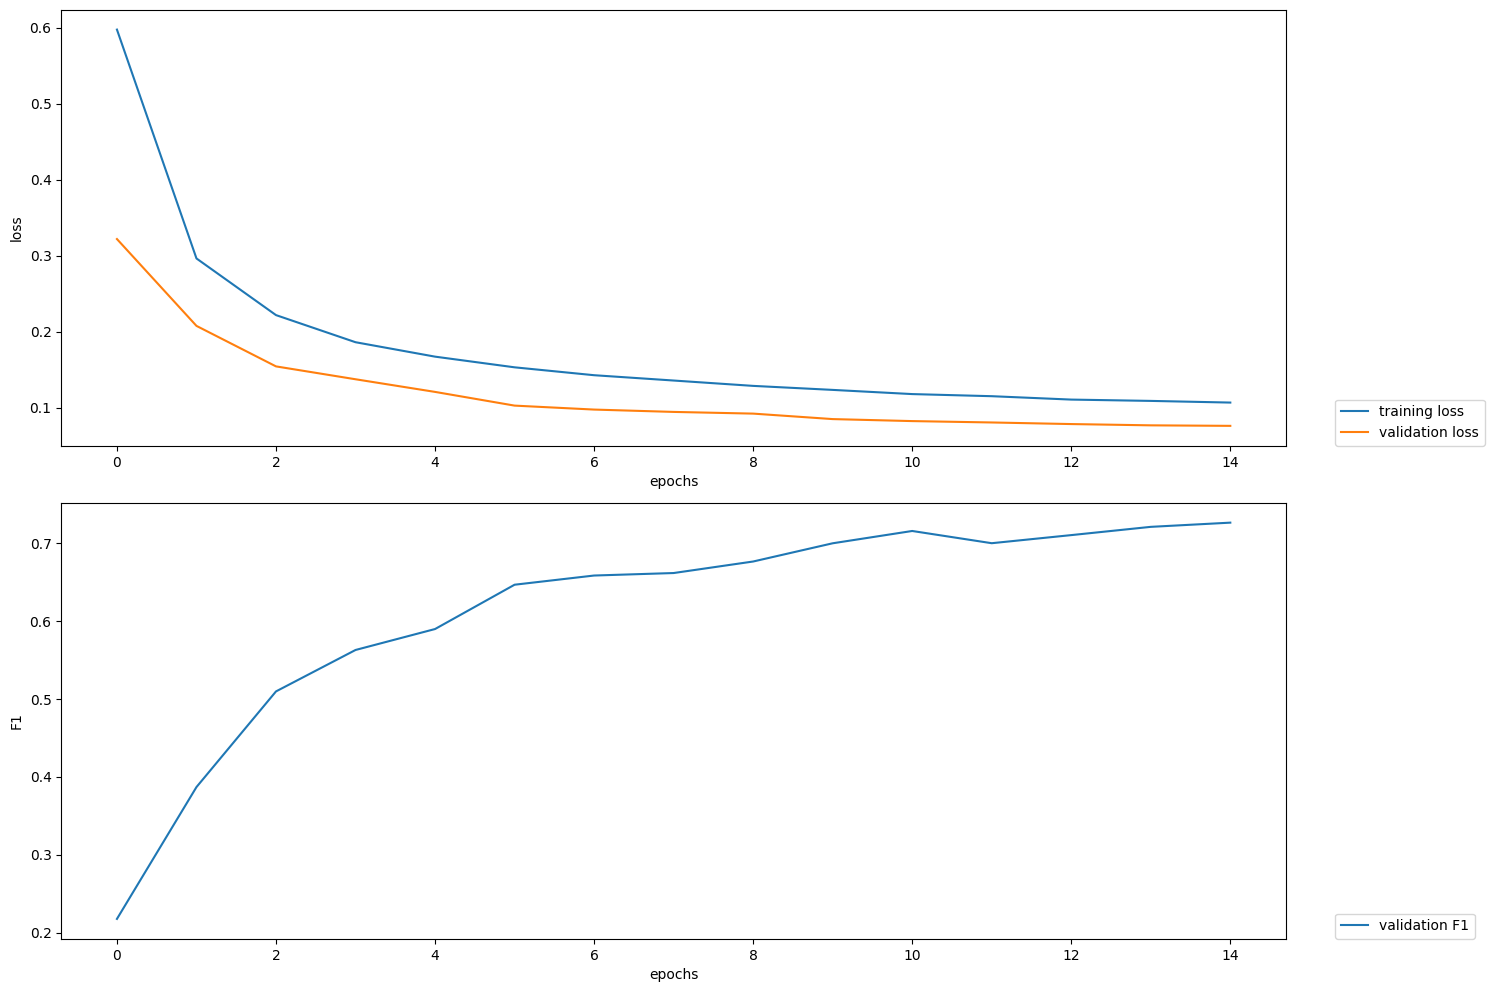

In [10]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('flair-model/loss.tsv')